In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../../data/fuel-econ.csv')
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [4]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'] # ordered by size
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses)

df['trans_type'] = df['trans'].apply(lambda x: x.split()[0])

base_color = sns.color_palette()[0]

### Example 0A - Bivariate Boxplot  (one categorical & one quantitative)

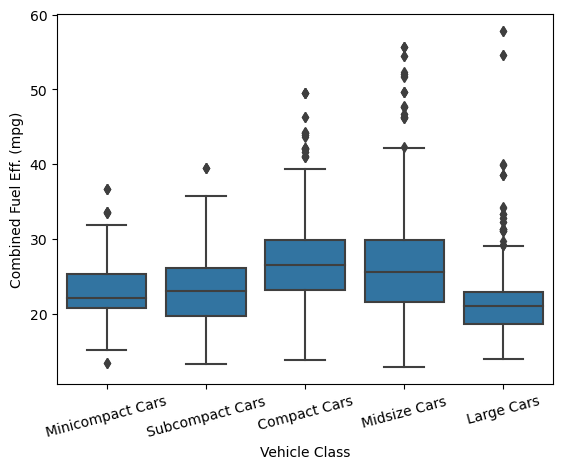

In [5]:
sns.boxplot(data=df, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.xlabel('Vehicle Class')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Example 0B - Multivariate example (two categorical & one quantitative)

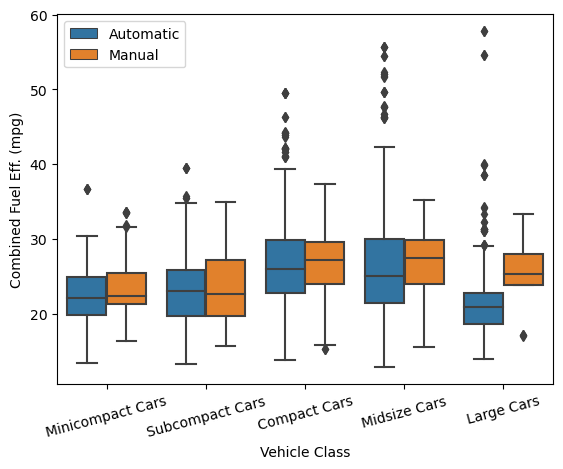

In [6]:
sns.boxplot(data=df, x='VClass', y='comb', hue='trans_type', palette='tab10')
plt.xticks(rotation=15)
plt.xlabel('Vehicle Class')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(title=None);

### Example 0C

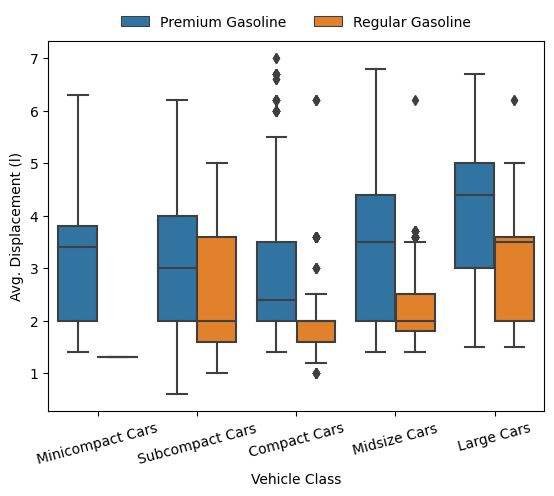

In [7]:
df_sub = df[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
sns.boxplot(data=df_sub, x='VClass', y='displ', hue='fuelType')
plt.xticks(rotation=15)
plt.ylabel('Avg. Displacement (l)')
plt.xlabel('Vehicle Class')
plt.legend(loc='lower center', bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False);

### Example 1 - Violin vs Box plot

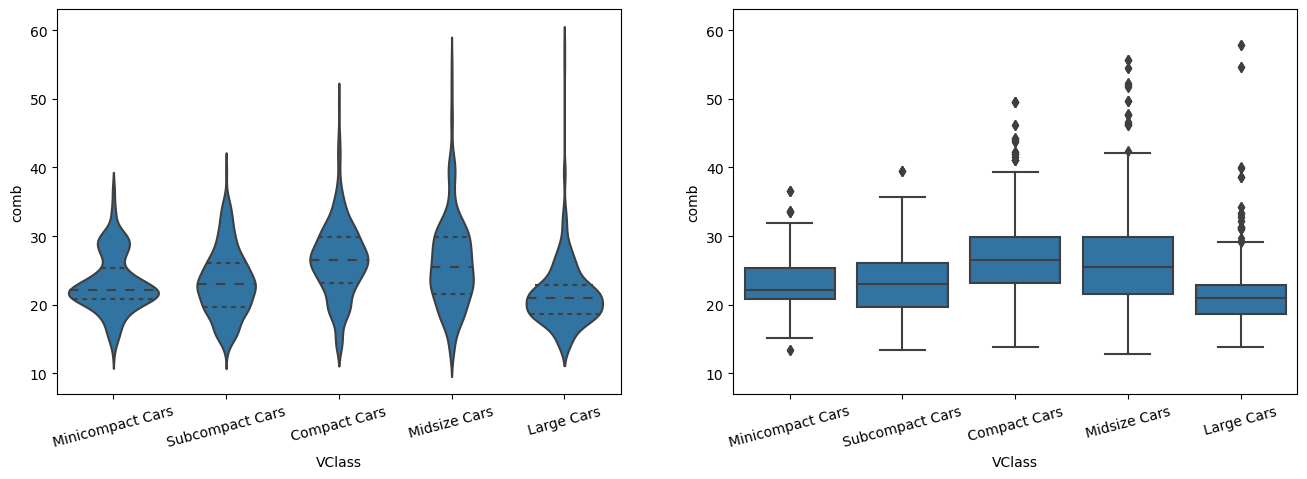

In [8]:
plt.figure(figsize=[16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data=df, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=15) # rotate x-axis labels

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

Remember, for a violin plot the lines remember the quartiles where the small dashes are $Q1$ and $Q3$ while the large dashes are the medians, i.e., $Q2$.

For a box plot, the center line is the median while the outer lines of the box represent $Q1$ and $Q3$. The height of the box is the interquartile range (IQR). The whiskers are set, by default, to $1.5 \times \text{IQR}$.

From the above, we should see that the box plot is a cleaner summary of the data than the violin plot making it worth consideration for building explanatory plots or when there are many groups to compare. On the other hand, the box plot lacks as nuanced of a depiction as the violin plot, which may make them a better option for exploratory plots. For instance, you cannot see the bimodality present in `Minicompact Cars`.

### Example 2 - Horizontal box plot

<Axes: xlabel='comb', ylabel='VClass'>

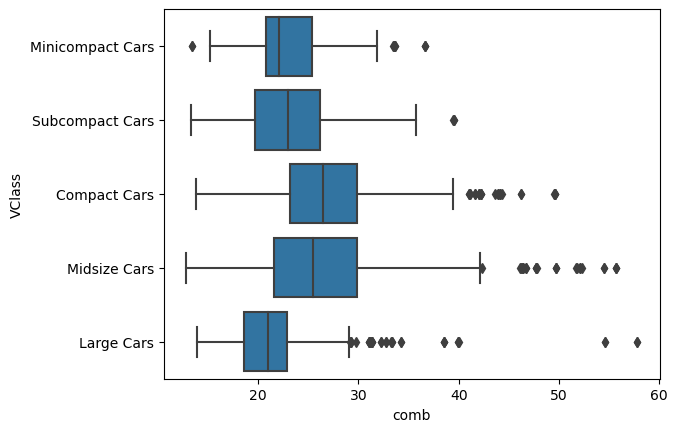

In [9]:
sns.boxplot(data=df, y='VClass', x='comb', color=base_color)

### Example 3 - Plot matrix

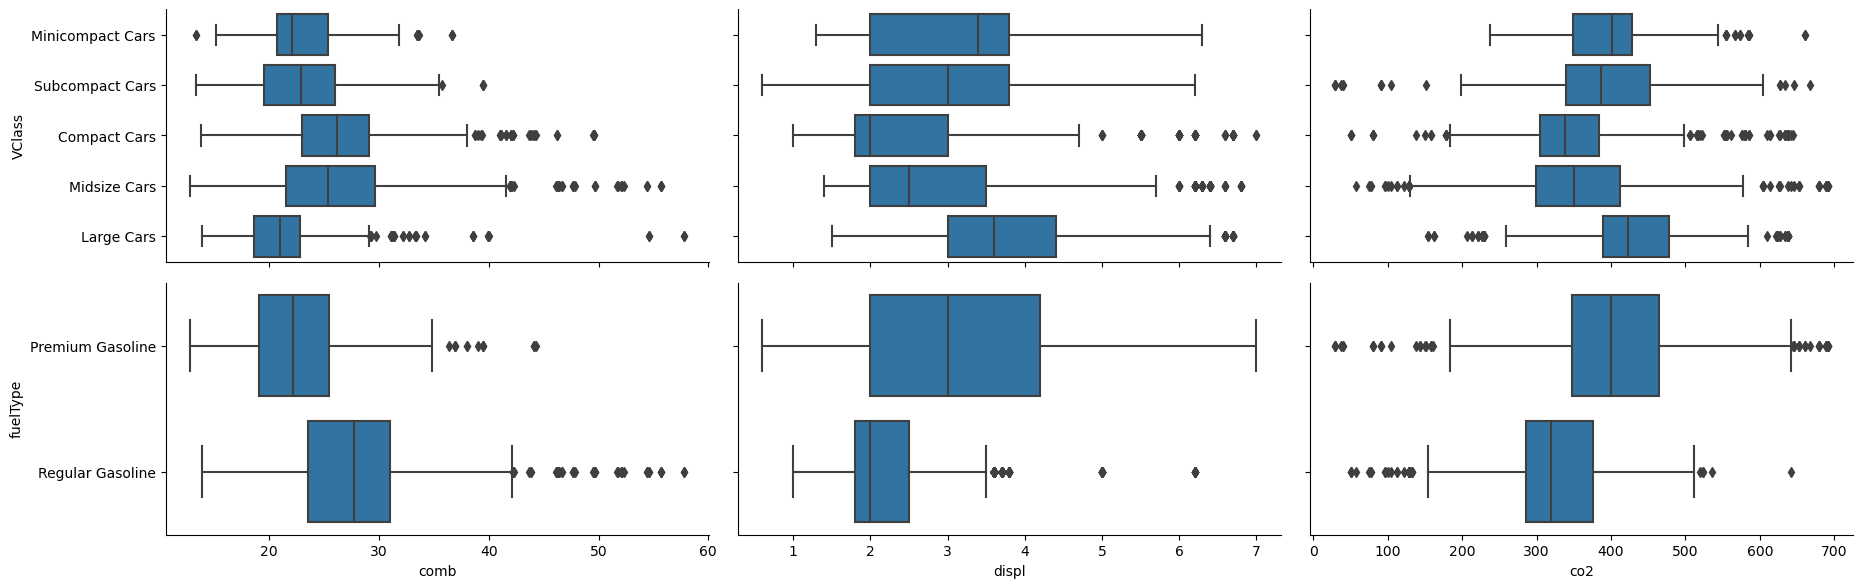

In [10]:
df_sub = df[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

g = sns.PairGrid(data=df_sub, x_vars=['comb', 'displ', 'co2'], y_vars=['VClass', 'fuelType'], height=3, aspect=2)
g.map(sns.boxplot, color=base_color);